# KG-OntoML: Build Embeddings

Get requirements.

In [1]:
!pip install -q grape -U
!pip install -q plot_keras_history seedir silence_tensorflow
# !pip install -q tsnecuda==3.0.0+cu110 -f https://tsnecuda.isx.ai/tsnecuda_stable.html --no-dependencies
!pip install -q faiss

# In order to disable often useless TensorFlow warnings
import silence_tensorflow.auto

from ensmallen import Graph

     |████████████████████████████████| 42.5 MB 117.2 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 97 kB 7.0 MB/s 
     |████████████████████████████████| 99 kB 9.3 MB/s 
     |████████████████████████████████| 112 kB 5.4 MB/s 
     |████████████████████████████████| 175 kB 40.1 MB/s 
     |████████████████████████████████| 4.7 MB 5.6 MB/s 


Retrieve the KG-OntoML graph, decompress it, and check it.

In [2]:
!wget https://kg-hub.berkeleybop.io/kg-ontoml/20220304/KG-OntoML.tar.gz

--2022-03-09 17:37:32--  https://kg-hub.berkeleybop.io/kg-ontoml/20220304/KG-OntoML.tar.gz
Resolving kg-hub.berkeleybop.io (kg-hub.berkeleybop.io)... 108.156.91.31, 108.156.91.16, 108.156.91.115, ...
Connecting to kg-hub.berkeleybop.io (kg-hub.berkeleybop.io)|108.156.91.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44235554 (42M) [application/gzip]
Saving to: ‘KG-OntoML.tar.gz’

KG-OntoML.tar.gz    100%[===================>]  42.19M   125MB/s    in 0.3s    

2022-03-09 17:37:33 (125 MB/s) - ‘KG-OntoML.tar.gz’ saved [44235554/44235554]



In [3]:
!tar -xvzf KG-OntoML.tar.gz

merged-kg_nodes.tsv
merged-kg_edges.tsv


In [ ]:
!head merged-kg_nodes.tsv

id	category	name	description	xref	provided_by	synonym	0000052	0000061	0000114	0000178	0000184	0000231	0000233	0000234	0000386	0000399	0000424	0000425	0000426	0000589	0000905	0006012	0037192	0100001	9000002	:http://attempto.ifi.uzh.ch/ace_lexicon#TV_pl	:http://attempto.ifi.uzh.ch/ace_lexicon#TV_sg	:http://attempto.ifi.uzh.ch/ace_lexicon#TV_vbg	:http://geneontology.org/formats/oboInOwl#created_by	:http://purl.obolibrary.org/obo/chebi/charge	:http://purl.obolibrary.org/obo/chebi/formula	:http://purl.obolibrary.org/obo/chebi/inchi	:http://purl.obolibrary.org/obo/chebi/inchikey	:http://purl.obolibrary.org/obo/chebi/mass	:http://purl.obolibrary.org/obo/chebi/monoisotopicmass	:http://purl.obolibrary.org/obo/chebi/smiles	:http://purl.org/spar/cito/citesAsAuthority	:http://usefulinc.com/ns/doap#revision	:http://www.ebi.ac.uk/cellline/definition	:http://www.ebi.ac.uk/cellline/definition_editor	:http://www.ebi.ac.uk/efo/alternative_term	:http://www.ebi.ac.uk/efo/definition	:http://www.ebi.ac.uk/e

In [ ]:
!head merged-kg_edges.tsv

id	subject	predicate	object	category	relation	knowledge_source	logical_interpretation
OBO:FBbt_00004566-biolink:subclass_of-OBO:FBbt_00004554	OBO:FBbt_00004566	biolink:subclass_of	OBO:FBbt_00004554		rdfs:subClassOf	Graph	
urn:uuid:a564b8a3-6fee-45f8-8cc8-d0d6093c6c64	OBO:FBbt_00004566	biolink:develops_from	OBO:FBbt_00001781	biolink:Association	RO:0002202	Graph	owlstar:AllSomeInterpretation
urn:uuid:c1ef3711-892c-4470-b9b0-062fc0c95fda	OBO:FBbt_00004566	biolink:part_of	OBO:FBbt_00004565	biolink:Association	BFO:0000050	Graph	owlstar:AllSomeInterpretation
OBO:FBbt_00004554-biolink:subclass_of-OBO:FBbt_00004475	OBO:FBbt_00004554	biolink:subclass_of	OBO:FBbt_00004475		rdfs:subClassOf	Graph	
urn:uuid:1f6a4aa4-abee-4335-acef-cab6be117d77	OBO:FBbt_00004554	biolink:part_of	OBO:FBbt_00004553	biolink:Association	BFO:0000050	Graph	owlstar:AllSomeInterpretation
XPO:0136009-biolink:subclass_of-XPO:0135498	XPO:0136009	biolink:subclass_of	XPO:0135498		rdfs:subClassOf	Graph	
XPO:0136009-biolink:subclas

In [4]:
g= Graph.from_csv(
  directed=False,
  node_path='merged-kg_nodes.tsv',
  edge_path='merged-kg_edges.tsv',
  verbose=True,
  nodes_column='id',
  node_list_node_types_column='category',
  default_node_type='biolink:NamedThing',
  sources_column='subject',
  destinations_column='object',
  default_edge_type='biolink:related_to'
)
g

<p>The undirected graph has 511960 homogeneous nodes and 766323 homogeneous edges.</p><h3>RAM requirements</h3><p>The RAM requirements for the nodes and edges data structures are 129.83MB and 3.73MB respectively.</p><h3>Degree centrality</h3><p>The minimum node degree is 0, the maximum node degree is 21699, the mode degree is 1, the mean degree is 2.99 and the node degree median is 1.</p><p>The nodes with highest degree centrality are: <a href='http://purl.obolibrary.org/obo/CLO_0000374' target='_blank' title='Go to Cell Line Ontology to get more informations about CLO:0000374'>CLO:0000374</a> (degree 21699 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), GOP:chebi_ph7_3 (degree 11295 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='https://www.ncbi.nlm.nih.gov/taxonomy/?term=species' target='_blank' title='Go to NCBI Taxonomy to get more informations about NCBITaxon:species'>NCBITaxon:species</a> (degree 5014 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://purl.obolibrary.org/obo/IAO_0000227' target='_blank' title='Go to Information Artifact Ontology to get more informations about IAO:0000227'>IAO:0000227</a> (degree 4510 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>) and <a href='http://purl.obolibrary.org/obo/mondo#ordo_disease' target='_blank' title='Go to Open Biomedical Ontology to get more informations about OBO:mondo#ordo_disease'>OBO:mondo#ordo_disease</a> (degree 3981 and node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>).</p><h3>Disconnected nodes</h3><p>Disconnected nodes are nodes that are not connected to any other node.The graph contains 46924 disconnected nodes.</p><h4>Singleton nodes</h4><p>Singleton nodes are nodes with no edge to other nodes nor selfloops. The graph contains 46922 singleton nodes, which are <a href='http://purl.obolibrary.org/obo/GENO_0000634' target='_blank' title='Go to Genotype Ontology to get more informations about GENO:0000634'>GENO:0000634</a> (node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://purl.obolibrary.org/obo/GOREL_0002005' target='_blank' title='Go to Gene Ontology Relations to get more informations about GOREL:0002005'>GOREL:0002005</a> (node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://purl.obolibrary.org/obo/CLO_0000167' target='_blank' title='Go to Cell Line Ontology to get more informations about CLO:0000167'>CLO:0000167</a> (node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get more informations about biolink:NamedThing'>biolink:NamedThing</a>), <a href='http://www.obofoundry.org/ro/ro.owl#contained_in' target='_blank' title='Go to website to get more informations about http:&#x2f;&#x2f;www.obofoundry.org&#x2f;ro&#x2f;ro.owl#contained_in'>http:&#x2f;&#x2f;www.obofoundry.org&#x2f;ro&#x2f;ro.owl#contained_in</a> (node type <a href='https://biolink.github.io/biolink-model/docs/NamedThing.html' target='_blank' title='Go to BioLink to get mo

Now it's time to build the embeddings.

Even on a GPU, the following may take >16 min per epoch, so it's not ideal for demonstration purposes. A full SkipGram embedding on KG-OntoML with default parameters requires at least 12 epochs (>3 hours).

One option is to pass `compute_node_embedding` some extra arguments. 
* `use_mirrored_strategy=False` - disables multi-GPU support, but may help avoid some errors
* `iterations=1` - perform a single iteration only
* `walk_length=16` - the lowest reasonable distance for a random walk, for a SkipGram at least
* `verbose=2` - applies to all embedding methods; a useful level of verbosity

This method will also take the argument `fit_kwargs` - this is a dictionary - and any or all of the following key:values:

* `"epochs": 2` - the default for some methods is essentially forever
* `"early_stopping_patience": 1` - Start checking for early stop after first epoch
* `"early_stopping_min_delta": 0.5` - Minimum delta loss to stop training

See https://github.com/monarch-initiative/embiggen/blob/master/embiggen/embedders/embedder.py#L272 for other params.

/usr/local/lib/python3.7/dist-packages/embiggen/pipelines/compute_node_embedding.py:266: UserWarning: It was not possible to detect GPUs but the system has NVIDIA drivers installed.
It is very likely there is some mis-configuration with your TensorFlow instance.
The model will train a LOT faster if you figure out what may be the cause of this issue on your system: sometimes a simple reboot will do a lot of good.
  "It was not possible to detect GPUs but the system "


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa00e486dd0>,
       dtype=object))

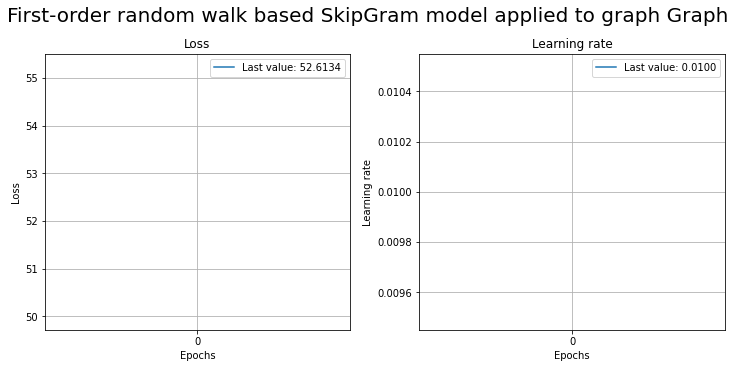

In [6]:
from embiggen.pipelines import compute_node_embedding
from plot_keras_history import plot_history

'''
These current values will not produce very good embeddings.
They 
'''

node_embedding_method_name = "SkipGram"

first_order_rw_node_embedding, training_history = compute_node_embedding(
    g,
    use_mirrored_strategy=False,
    node_embedding_method_name=node_embedding_method_name,
    iterations=1,
    walk_length=16,
    verbose=2,
    fit_kwargs={"epochs": 1}
)

plot_history(
    training_history,
    title="First-order random walk based {} model applied to graph {}".format(
        node_embedding_method_name,
        g.get_name()
    )
)